# COVID-19 Adatelemzés 

## $R_{0}$ Becslése

Két gyakran használt statisztikai becslési módszert fogunk megvizsgálni:  
(1) Exponenciális növekedési ütem alkalmazása $R_{0}$ becslésére (_exponential growth rate_)  
(2) Tényleges 'szaporodási' számmal való közelítés  



**(1) Módszer alkalmazása**  
Két statisztikai lépésben végezhető el ez a becslés: megbecsüljük az exponenciális növekedési ütemet, amit _r_ jelöl, majd _r_ segítségével kiszámítjuk $R_{0}$ értéket.

In [2]:
import sympy as sp

t=sp.Symbol('t')
j=sp.Function('j')
tau=sp.symbols(u'τ') #megfertőződés óta eltelt idő
A=sp.Function('A')


val=sp.integrate(A(tau)*j(t-tau), (tau, 0, sp.oo))

expr1=sp.Equality(j(t), val)
expr1

Eq(j(t), Integral(A(τ)*j(t - τ), (τ, 0, oo)))

Ha feltesszük, hogy a járvány kezdetekor $j(t)$ exponenciálisan növekedő _r_ sebességgel (ami az exponenciális növekedési ütem),  
akkor ebben az esetben könnyen megkapható $A(\tau)$

In [3]:
k=sp.Symbol('k')
r=sp.Symbol('r')
expr2=sp.Equality(j(t), k*sp.E**(r*t))
expr3=sp.Equality(j(t-tau), k*sp.E**(r*t)*sp.E**(-r*tau))

display(expr2,expr3)

Eq(j(t), k*exp(r*t))

Eq(j(t - τ), k*exp(r*t)*exp(-r*τ))

Egy egyszerű behelyettesítéssel megkaphatjuk:

In [4]:
expr4=sp.Equality(k*sp.E**(r*t), sp.integrate(A(tau)*k*sp.E**(r*t)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr4)

Eq(k*exp(r*t), k*exp(r*t)*Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mivel a sympy rendkívűl okos, ki is hozta az integrálból azokat a tagokat, amik nem függnek $\tau$-tól. Egy egyszerű átosztással pedig a következő egyenlőséget kapjuk:

In [5]:
expr5=sp.Equality(1, sp.integrate(A(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr5)

Eq(1, Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mostmár közel vagyunk ahhoz, hogy meghatározzuk $A(\tau)$-t és onnan már egy egyszerű lépés, hogy kapjunk egy értéket $R_{0}$-ra is. Ehhez vesszük $g(\tau)$ függvényt, ami 'generálódási' idő sűrűségfüggvénye, azaz azt mondja meg, hogy $\tau$ idő alatt mennyire gyakori a másodlagos megbetegedések száma.

In [6]:
g=sp.Function('g')
s=sp.Symbol('s')
expr6=sp.Equality(g(tau), A(tau)/sp.integrate(A(s), (s, 0, sp.oo)))
display(expr6)

Eq(g(τ), A(τ)/Integral(A(s), (s, 0, oo)))

Itt a nevező jelentése: az összes elsődlegesen megfertőzödött egyén által megfertőzött másodlagos fertőzések száma, ami a definícionk alapján pont $R_{0}$. Vagyis azt kapjuk, hogy:

In [7]:
R_0=sp.Symbol('R_0')
expr7=sp.Equality(g(tau), A(tau)/R_0)
expr8=sp.Equality(A(tau), R_0*g(tau))
display(expr7, expr8)

Eq(g(τ), A(τ)/R_0)

Eq(A(τ), R_0*g(τ))

Ezt visszahelyettesítve az (5)-ös egyenletünkbe megkapjuk:

In [8]:
expr9=sp.Equality(1, sp.integrate(R_0*g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
expr10=sp.Equality(R_0, 1/sp.integrate(g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr9, expr10)

Eq(1, R_0*Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Eq(R_0, 1/Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Ezzel megkapunk egy becslést $R_{0}$-ra, amihez két adatra van szükségünk:  
(1) a már említett _r_ exponenciális növekedési ütem  
(2) valamint a $g(\tau)$, ami a másodlagos megfertőződések száma $\tau$ idő alatt  
  
Persze számos másfajta becslése is létezik $R_{0}$-nak, pl. az Actual Reproduction Number segítségével vett közelítés, ML-becslés, SIR modellből származtatott $R_{0}$ és még sok más.
A korábbiakban levezetett 'képlet' $R_{0}$-ra talán a leggyakrabban használt számítási módszer, de kell hozzá _r_.

### r meghatározása
**'Pure Birth Process' (Folytonos Markov Láncok spec. esete)**  
Ha ismert a 0-adik időpillanattól a $t-1$-edik időpillanatig az új fertőzések száma (azaz, amit $j(t)$-vel jelöltünk korábban), akkor a $t$-edik időpillanatban az esetek számának ($J_{t}$) felételes valószínűsége a következő kifejezéssel arányos:

In [9]:
J_i=sp.Symbol('J_i')
J_t=sp.Symbol('J_t')
J_0=sp.Symbol('J_0')
i=sp.Symbol('i')
expr11=sp.E**(-r*sp.Sum(J_i, (i, 0, t-1)))*(1-sp.E**(-r))**(J_t-J_0)
display(expr11)

(1 - exp(-r))**(-J_0 + J_t)*exp(-r*Sum(J_i, (i, 0, t - 1)))

Ebből meghatározható _r_ Maximum-Likelihood becsléssel (és adható 95%-os konfidenciaintervallum)

## $R_{0}$ vizsgálata és ábrázolása számított adatokból

Az alábbiakban 8 országban a megfigyelt fertőzött egyének számát és az exponenciális növekedési ütemmel becsült $R_{0}$ (basic reproduction number) viszonyát vetjük össze. Először beolvassuk az adatokat.

In [10]:
import pandas as pd
import seaborn as sns
import warnings

R_0_vals = pd.read_csv('R0_vals.csv')
USA_cases = pd.read_csv('USA.csv')
India_cases = pd.read_csv('India.csv')
Brazil_cases = pd.read_csv('Brazil.csv')
Russia_cases = pd.read_csv('Russia.csv')
Peru_cases = pd.read_csv('Peru.csv')
Colombia_cases = pd.read_csv('Colombia.csv')
Turkey_cases = pd.read_csv('Turkey.csv')
Germany_cases = pd.read_csv('Germany.csv')

In [11]:
cases=[USA_cases,India_cases,Brazil_cases,Russia_cases,Peru_cases,Colombia_cases,Turkey_cases,Germany_cases]

Ezután mivel az $R_{0}$-at tartalmazó táblázatban a dátumok nem azonos formátumúak a további adatokat tartalmazó táblázatokkal, így ezeket átírjuk, hogy a többi dátummal a későbbiekben összehasonlítható legyen.

In [12]:
pd.options.mode.chained_assignment = None 
R_0_vals = pd.read_csv('R0_vals.csv')
for i in range(len(R_0_vals)):
    if len(R_0_vals['Date'][i])==8:
        R_0_vals['Date'][i]=(R_0_vals['Date'][i])[1:5]
        
for i in range(len(R_0_vals)):
    if (R_0_vals['Date'][i])[2]=='0':
        R_0_vals['Date'][i]=(R_0_vals['Date'][i])[0:2]+(R_0_vals['Date'][i])[3]
display(R_0_vals)

,Date,USA,India,Brazil,Russia,Peru,Colombia,Turkey,Germany
0,2/8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/12,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,9/7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
213,9/8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
214,9/9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
215,9/10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
for i in range(len(R_0_vals)):
    R_0_vals['Date'][i]='2020/'+(R_0_vals['Date'][i])[0:5]
display(R_0_vals)

,Date,USA,India,Brazil,Russia,Peru,Colombia,Turkey,Germany
0,2020/2/8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/2/9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/2/12,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,2020/9/7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
213,2020/9/8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
214,2020/9/9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
215,2020/9/10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A többi táblázatban találhatóak olyan adatokat tartalmazó oszlopok, amik az $R_{0}$ számításhoz hasznosak voltak, de számunkra nem relevánsak, így eltároljuk csak a fertőzött egyének számát minden országból.

In [14]:
Table=pd.DataFrame(columns=['Date', 'USA infected', 'India infected', 'Brazil infected', 'Russia infected', 
                            'Peru infected', 'Colombia infected', 'Turkey infected', 'Germany infected'])
Table['Date']=R_0_vals['Date']
infected_list=['USA infected', 'India infected', 'Brazil infected', 'Russia infected', 'Peru infected', 'Colombia infected', 'Turkey infected', 'Germany infected']
for j in range(len(infected_list)):
    for i in range(len(Table)):
        if len(cases[j].loc[cases[j]['Date']==Table['Date'][i], 'Infected individuals'].values)>0:
            Table[infected_list[j]][i]=cases[j].loc[cases[j]['Date']==Table['Date'][i], 'Infected individuals'].values[0]
        else:
            continue
Table

,Date,USA infected,India infected,Brazil infected,Russia infected,Peru infected,Colombia infected,Turkey infected,Germany infected
0,2020/2/8,11,3,NaN,2,NaN,NaN,NaN,13
1,2020/2/9,11,3,NaN,2,NaN,NaN,NaN,14
2,2020/2/10,11,3,NaN,2,NaN,NaN,NaN,14
3,2020/2/11,12,3,NaN,2,NaN,NaN,NaN,16
4,2020/2/12,12,3,NaN,2,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...
212,2020/9/7,6300622,4280422,4147794,1027334,689977,671848,281509,253626
213,2020/9/8,6327009,4370128,4162073,1032354,691575,671533,283270,254957
214,2020/9/9,6360212,4465863,4197889,1037526,696190,686851,284943,256433
215,2020/9/10,6396100,4562414,4238446,1042836,702776,694664,286455,258149


Az adattisztogatás végével itt jön az érdekesebb rész. Tekintjük, hogy a becsült $R_{0}$ segítségével várhatóan mennyi lehet a rákövetkező napon a fertőzöttek száma, majd ezt összevetjük a megfigyelt esetszámmal.

In [15]:
approximated=[0]
for i in range(1,len(R_0_vals)):
    approximated.append(R_0_vals['USA'][i]*Table['USA infected'][i])
approximated 
approximated_data={
    'approximated' : approximated,
    'date' : R_0_vals['Date']
}
approximated_data=pd.DataFrame(approximated_data)
approximated_data

approximated_data.reset_index(inplace=True)
approximated_data.set_index('date', inplace=True)

In [16]:
Table.reset_index(inplace=True)
Table.set_index('Date', inplace=True)

In [17]:
Table1 = Table.iloc[[ i for i in range(0,25)]]
Table2 = approximated_data.iloc[[ i for i in range(0,25)]]

Table3 = Table.iloc[[ i for i in range(25,50)]]
Table4 = approximated_data.iloc[[ i for i in range(25,50)]]

Table5 = Table.iloc[[ i for i in range(50,75)]]
Table6 = approximated_data.iloc[[ i for i in range(50,75)]]

Table7 = Table.iloc[[ i for i in range(75,100)]]
Table8 = approximated_data.iloc[[ i for i in range(75,100)]]

Table9 = Table.iloc[[ i for i in range(100,125)]]
Table10 = approximated_data.iloc[[ i for i in range(100,125)]]

Table11 = Table.iloc[[ i for i in range(190,216)]]
Table12 = approximated_data.iloc[[ i for i in range(190,216)]]

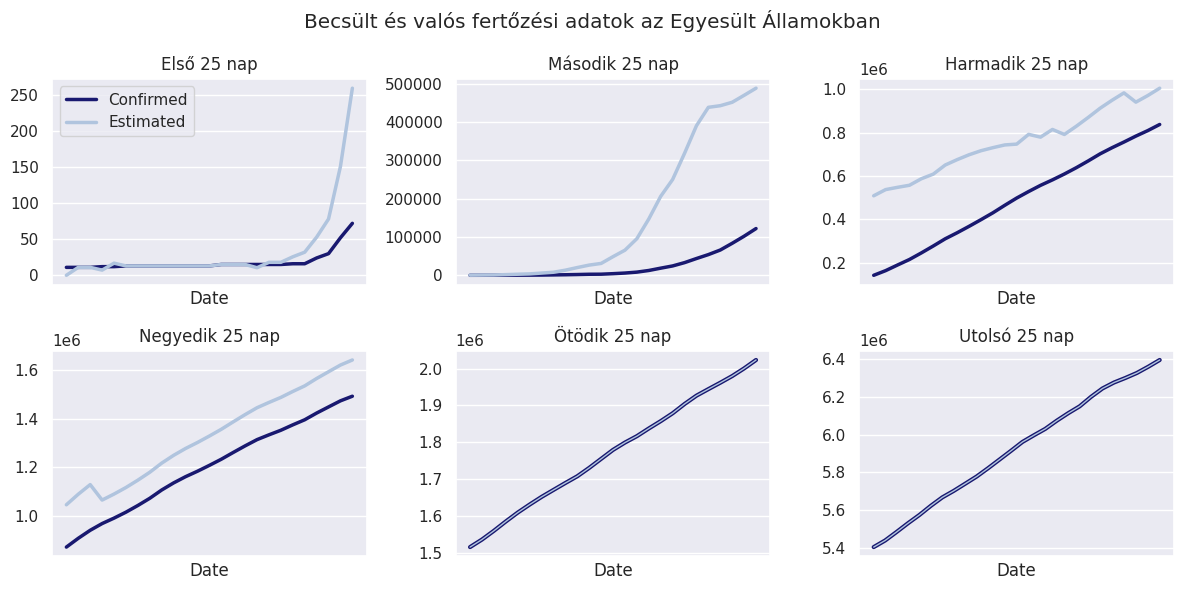

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, figsize=(12,6))

sns.set_theme(style="darkgrid")

g1=sns.lineplot(data=Table1['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,0], label='Confirmed')
sns.lineplot(data=Table2['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,0], label='Estimated')
g1.set(xticks=[])
g1.set_ylabel(None)
axs[0,0].set_title('Első 25 nap')

g2=sns.lineplot(data=Table3['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,1])
sns.lineplot(data=Table4['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,1])
g2.set(xticks=[])
g2.set_ylabel(None)
axs[0,1].set_title('Második 25 nap')

g3=sns.lineplot(data=Table5['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,2])
sns.lineplot(data=Table6['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,2])
g3.set(xticks=[])
g3.set_ylabel(None)
axs[0,2].set_title('Harmadik 25 nap')

g4=sns.lineplot(data=Table7['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[1,0])
sns.lineplot(data=Table8['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[1,0])
g4.set(xticks=[])
g4.set_ylabel(None)
axs[1,0].set_title('Negyedik 25 nap')

g5=sns.lineplot(data=Table9['USA infected'], linewidth=3, color='midnightblue', ax=axs[1,1])
sns.lineplot(data=Table10['approximated'], linewidth=1, color='lightsteelblue', ax=axs[1,1])
g5.set(xticks=[])
g5.set_ylabel(None)
axs[1,1].set_title('Ötödik 25 nap')

g6=sns.lineplot(data=Table11['USA infected'], linewidth=3, color='midnightblue', ax=axs[1,2])
sns.lineplot(data=Table12['approximated'], linewidth=1, color='lightsteelblue', ax=axs[1,2])
g6.set(xticks=[])
g6.set_ylabel(None)
axs[1,2].set_title('Utolsó 25 nap')

axs[0,0].legend()
fig.suptitle('Becsült és valós fertőzési adatok az Egyesült Államokban')
plt.tight_layout()
plt.show()

In [19]:
warnings.simplefilter(action='ignore', category=FutureWarning)
India_approximated=[0]
for i in range(1,len(R_0_vals)):
    India_approximated.append(R_0_vals['India'][i]*Table['India infected'][i])
India_approximated 
India_approximated_data={
    'approximated' : India_approximated,
    'date' : R_0_vals['Date']
}
India_approximated_data=pd.DataFrame(approximated_data)

India_approximated_data.reset_index(inplace=True)
India_approximated_data.set_index('date', inplace=True)

In [20]:
table1 = Table.iloc[[ i for i in range(0,25)]]
table2 = India_approximated_data.iloc[[ i for i in range(0,25)]]

table3 = Table.iloc[[ i for i in range(25,50)]]
table4 = India_approximated_data.iloc[[ i for i in range(25,50)]]

table5 = Table.iloc[[ i for i in range(50,75)]]
table6 = India_approximated_data.iloc[[ i for i in range(50,75)]]

table7 = Table.iloc[[ i for i in range(75,100)]]
table8 = India_approximated_data.iloc[[ i for i in range(75,100)]]

table9 = Table.iloc[[ i for i in range(100,125)]]
table10 = India_approximated_data.iloc[[ i for i in range(100,125)]]

table11 = Table.iloc[[ i for i in range(190,216)]]
table12 = India_approximated_data.iloc[[ i for i in range(190,216)]]

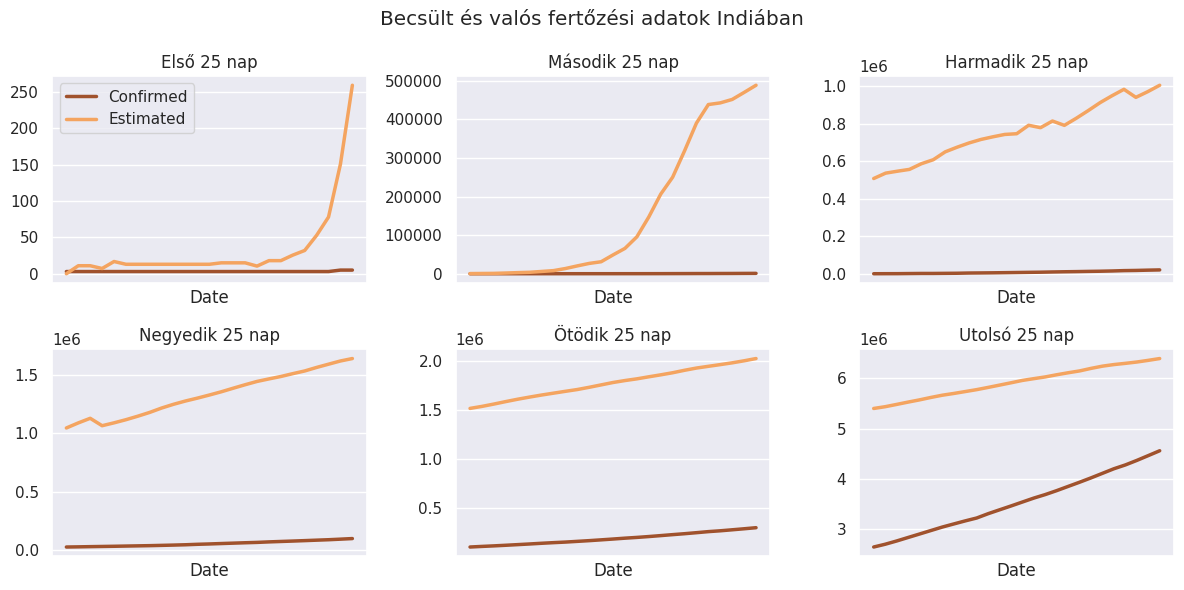

In [31]:
fig, axs = plt.subplots(2,3, figsize=(12,6))

sns.set_theme(style="darkgrid")

h1=sns.lineplot(data=table1['India infected'], linewidth=2.5, color='sienna', ax=axs[0,0], label='Confirmed')
sns.lineplot(data=table2['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,0], label='Estimated')
h1.set(xticks=[])
h1.set_ylabel(None)
axs[0,0].set_title('Első 25 nap')

h2=sns.lineplot(data=table3['India infected'], linewidth=2.5, color='sienna', ax=axs[0,1])
sns.lineplot(data=table4['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,1])
h2.set(xticks=[])
h2.set_ylabel(None)
axs[0,1].set_title('Második 25 nap')

h3=sns.lineplot(data=table5['India infected'], linewidth=2.5, color='sienna', ax=axs[0,2])
sns.lineplot(data=table6['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,2])
h3.set(xticks=[])
h3.set_ylabel(None)
axs[0,2].set_title('Harmadik 25 nap')

h4=sns.lineplot(data=table7['India infected'], linewidth=2.5, color='sienna', ax=axs[1,0])
sns.lineplot(data=table8['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,0])
h4.set(xticks=[])
h4.set_ylabel(None)
axs[1,0].set_title('Negyedik 25 nap')

h5=sns.lineplot(data=table9['India infected'], linewidth=2.5, color='sienna', ax=axs[1,1])
sns.lineplot(data=table10['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,1])
h5.set(xticks=[])
h5.set_ylabel(None)
axs[1,1].set_title('Ötödik 25 nap')

h6=sns.lineplot(data=table11['India infected'], linewidth=2.5, color='sienna', ax=axs[1,2])
sns.lineplot(data=table12['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,2])
h6.set(xticks=[])
h6.set_ylabel(None)
axs[1,2].set_title('Utolsó 25 nap')

axs[0,0].legend()
fig.suptitle('Becsült és valós fertőzési adatok Indiában')
plt.tight_layout()
plt.show()

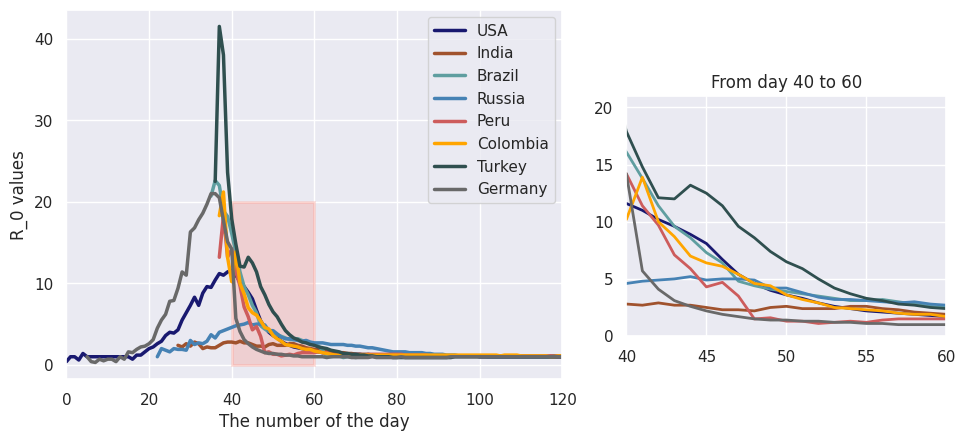

In [36]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
sns.set_theme(style='darkgrid')

namelist=['USA', 'India', 'Brazil', 'Russia', 'Peru', 'Colombia', 'Turkey', 'Germany']
colorlist=['midnightblue', 'sienna', 'cadetblue', 'steelblue', 'indianred', 'orange',  'darkslategrey', 'dimgray']

for i in range(len(namelist)):
    sns.lineplot(data=R_0_vals[namelist[i]], linewidth=2.5, color=colorlist[i], label=namelist[i])

plt.legend(loc="upper right")
plt.xlabel('The number of the day')
plt.ylabel('R_0 values')
plt.xlim(0,120)

left, bottom, width, height = (40, 0, 20, 20)
rect=mpatches.Rectangle((left,bottom),width,height,
                        color="salmon", alpha=0.25,
                       linewidth=2)
plt.gca().add_patch(rect)

sns.set_theme(style='darkgrid')
ax2 = plt.axes([1, 0.2, 0.5, 0.5])
for i in range(len(namelist)):
    sns.lineplot(R_0_vals[namelist[i]], linewidth=2, ax=ax2, color=colorlist[i])
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xlim([40,60])
ax2.set_ylim([0,21])
ax2.set_title('From day 40 to 60')

plt.show()

# SIR modell készítése
#### Anita és Ádám közös munkája  
Egy SIR-modell segítségével szeretnénk vizsgálni a járvány terjedésének alakulását. 

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import sympy as sym
from sympy.utilities.lambdify import implemented_function
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns
#matplotlib.use('tkAgg')

Felírjuk a kérdéses közönséges differenciálegyenlet rendszert. Itt:  
  
$S(t)$ jelöli a társadalomban a fertőzhető egyének számát  
$I(t)$ jelöli a társadalomban a fertőzött egyének számát  
$R(t)$ jelöli a társadalomban a gyógyult egyének számát  
  
Az egyszerűség kedvéért feltesszük, hogy a társadalom zárt, azaz eltekintünk a bevándorló, kivándorló, születő, vagy elhalálozó egyének esetleges számától.

In [3]:
t = sym.symbols('t')
S = sym.Function('S')(t)
I = sym.Function('I')(t)
R = sym.Function('R')(t)
beta = sym.symbols(u'β')
gamma = sym.symbols(u'γ')
dSdt=sym.Derivative(S,t)
dIdt=sym.Derivative(I,t)
dRdt=sym.Derivative(R,t)

eq1=sym.Equality(dSdt, -beta * S * I)
eq2=sym.Equality(dIdt, beta * S * I - gamma * I)
eq3=sym.Equality(dRdt,  gamma * I)

display(eq1,eq2,eq3)

Eq(Derivative(S(t), t), -β*I(t)*S(t))

Eq(Derivative(I(t), t), β*I(t)*S(t) - γ*I(t))

Eq(Derivative(R(t), t), γ*I(t))

Felmerül a kérdés, hogy mit reprezentál $\beta$, illetve $\gamma$. Az egyenletrendszerünkben:  
$\beta$ az a paraméter, amely meghatározza, hogy egy egyénnek naponta hány olyan kontaktusban volt része átlagosan, ami fertőzést eredményezett,  
$\gamma$ meghatározza, hogy a fertőzött egyének várhatóan mekkora része gyógyul meg bármelyik napon (pl. ha a fertőzés időtartama 3 nap, akkor $\gamma = \frac{1}{3}$)  
Innen persze az is látható, hogy csak azt tekintjük fertőzöttnek, aki még fertőzni képes, azaz ha valaki beteg, nem biztos, hogy I(t) csoportba tartozik.

### SIR-modell megvalósítása

Az alábbi táblázat az EU országainak néhány adatát tartalmazza. Amire nekünk szükségünk lesz az $R_{0}$, valamint a $\Delta t$. Mivel 27 ország vizsgálata kissé időigényes lenne, így választottunk néhány reprezentáns országot, (valamint belevettük az EU-s átlagot is), amelyekre felállítjuk az SIR-modellt. 

In [4]:
pd.options.mode.chained_assignment = None

sir_data=pd.read_csv("sir_data.csv")
sir_countries=["Austria","Finland","Germany","Hungary","Ireland","European Union"]
sir_data=sir_data[sir_data["Country"].isin(sir_countries)]

display(sir_data)

,Country,Population,R0,Rt,t*,T,Δt
0,Austria,8.840.521,4.38±0.36,0.45±0.01,13.37±0.68,6.49±0.47,8.33±1.70
8,Finland,5.515.525,1.62±0.05,0.92±0.01,25.05±0.51,1.20±0.68,24.25±2.49
10,Germany,82.905.782,6.33±0.64,0.58±0.01,17.06±1.39,12.41±0.71,3.25±1.92
12,Hungary,9.775.564,1.97±0.55,0.37±0.15,25.62±6.55,20.23±7.33,31.67±1.89
13,Ireland,4.867.309,1.94±0.06,0.57±0.03,30.78±0.53,5.94±1.28,30.00±3.46
27,European Union,446.786.293,4.22±1.69,0.67±0.18,18.61±6.43,10.82±4.65,17.24±2.00


Mivel az egyenletrendszerünkhöz szükség van $\beta$ és $\gamma$ paraméterekre, így az alábbiakban meghatározzuk $\beta$-t a táblázat adataiból ($\gamma$ = $\frac{1}{\Delta t}$). A már emlegetett $R_{0}$ egy lehetséges számítási módja: $R_{0} = \frac{\beta}{\gamma}$. Ha (talán) meg tudjuk oldani az egylenletet $\beta$-ra, akkor az adatokból miden országnak meg tudunk adni egy megfelelő $\beta$-t.

In [5]:
sir_indexes=[sir_data[sir_data['Country'] == country].index[-1] for country in sir_countries]
for index in sir_indexes:
    sir_data['R0'][index]=float(sir_data['R0'][index][0:(sir_data['R0'][index]).find('±')])
for index in sir_indexes:
    sir_data['Δt'][index]=float(sir_data['Δt'][index][0:(sir_data['Δt'][index]).find('±')])
sir_data.insert(7, "Beta", [sir_data["R0"][index]/sir_data["Δt"][index] for index in sir_indexes], True)
for index in sir_indexes:
    temp=sir_data['Population'][index]
    sir_data['Population'][index]=int(temp.replace('.', '', temp.count('.')))
    
display(sir_data)

,Country,Population,R0,Rt,t*,T,Δt,Beta
0,Austria,8840521,4.38,0.45±0.01,13.37±0.68,6.49±0.47,8.33,0.525810
8,Finland,5515525,1.62,0.92±0.01,25.05±0.51,1.20±0.68,24.25,0.066804
10,Germany,82905782,6.33,0.58±0.01,17.06±1.39,12.41±0.71,3.25,1.947692
12,Hungary,9775564,1.97,0.37±0.15,25.62±6.55,20.23±7.33,31.67,0.062204
13,Ireland,4867309,1.94,0.57±0.03,30.78±0.53,5.94±1.28,30.0,0.064667
27,European Union,446786293,4.22,0.67±0.18,18.61±6.43,10.82±4.65,17.24,0.244780


Az alábbiakban a paraméterek ismeretében megadjuk a KDE-t függvény alakban.

In [6]:
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

### Ábrázolás
Az ábrázoláshoz létrehozunk egy függvényt, ami adott országra megoldja az egyenletrendszert.


A (numerikus) megoldahtóság érdekében a társadalomban élők számát ($N$) egységnyinek tekintjük. Ekkor ha a járvány alakulását $t=0$ időpontból vizsgáljuk, akkor kezdetben:  
  
$s(t) = \frac{S(t)}{N} = 1$,  
$i(t) = \frac{I(t)}{N}$,  
$r(t) = \frac{R(t)}{N} = 0$  
  
A fertőzött egyének számát mi választottuk.

In [7]:
def sircountry(country: int, infected: int, days: int):
    beta = sir_data["Beta"][country]
    gamma = 1/sir_data["Δt"][country]
    I_initial = infected/sir_data["Population"][country]
    R_initial = 0
    S_initial = 1-R_initial-I_initial
    x_initial = S_initial, I_initial, R_initial
    t = np.linspace(0, days, days*12)
    sol = odeint(deriv, x_initial, t, args=(beta, gamma))
    s, i, r = sol.T*sir_data["Population"][country]
    
    return [s, i, r]
    

In [8]:
def millions(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Apply formatter to y axis
formatter = FuncFormatter(millions)

Az általunk választott országokra hívva az előbb említett függvényt, megkaphatjuk, hogy az SIR-modell milyen becslést ad a járvány lefolyására, amit az ábrákból tudunk kikövetkeztetni.

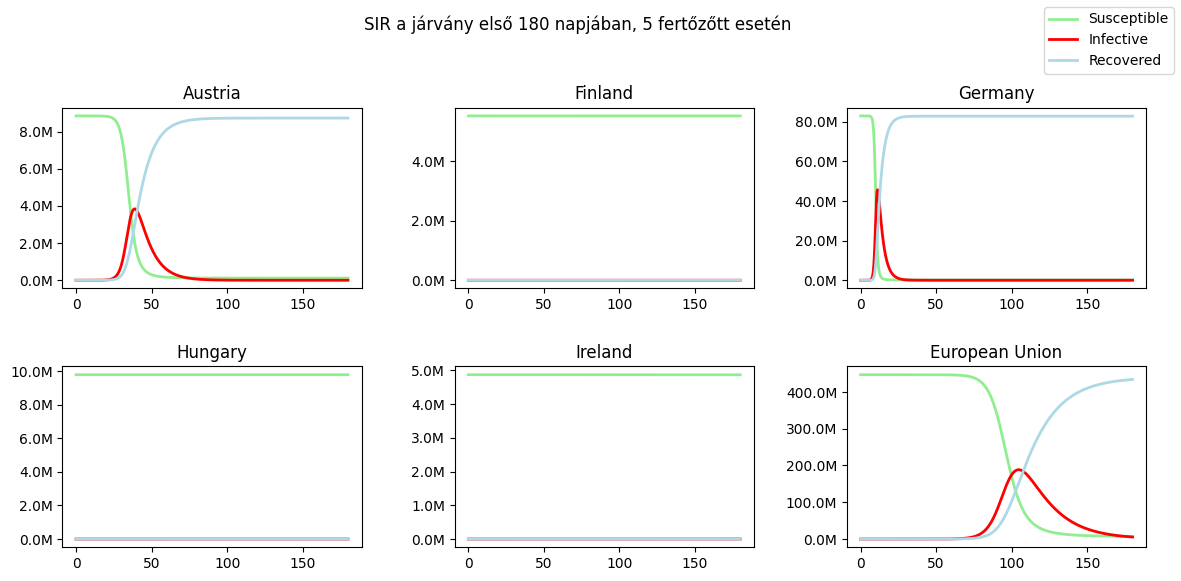

In [9]:
fig, axs = plt.subplots(2,3, figsize=(12,6))
counter=0
for i in range(0,2):
    for j in range(0,3):
        t = np.linspace(0, 180, 180*12)
        sir=sircountry(sir_indexes[counter],5,180)
        axs[i,j].plot(t, sir[0], lw=2, label='Susceptible', c='lightgreen')
        axs[i,j].plot(t, sir[1], lw=2, label='Infective', c='red')
        axs[i,j].plot(t, sir[2], lw=2, label='Recovered', c='lightblue')
        axs[i,j].set_title(f'{sir_countries[counter]}')
        axs[i,j].yaxis.set_major_formatter(formatter)
        
        counter+=1
        if counter==6:
            axs[1,2].legend()
            handles, labels = axs[1,2].get_legend_handles_labels()
            fig.legend(handles, labels, loc='upper right')
            axs[1,2].legend_ = None

fig.suptitle("SIR a járvány első 180 napjában, 5 fertőzőtt esetén")
fig.tight_layout(pad=2.3)

Az előbb tapasztalt furcsaságok megvizsgálására külön tekintjük Magyarország, Finnország és Írország adatait.

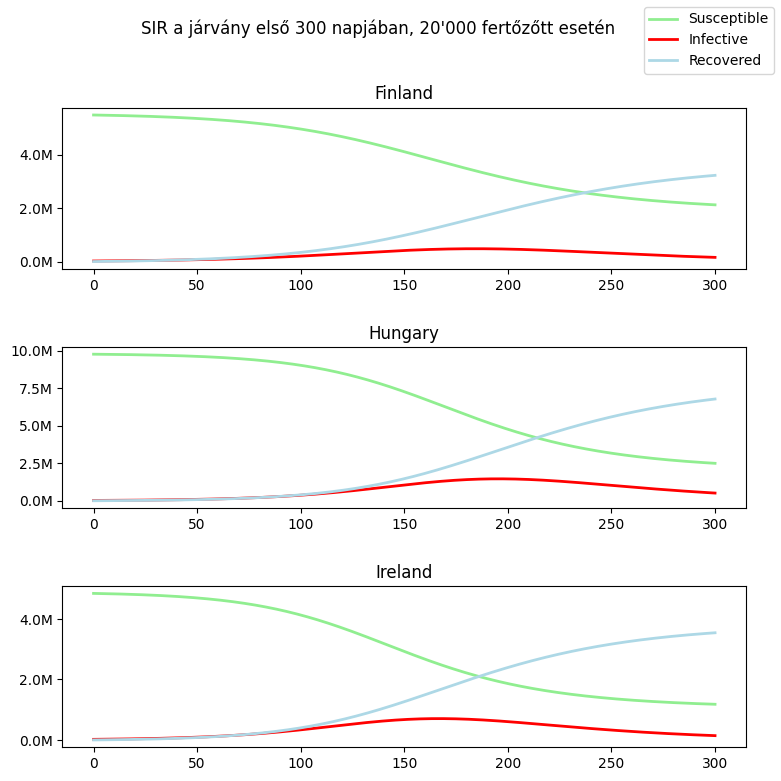

In [10]:
fig, axs = plt.subplots(3,1, figsize=(8,8))
subcountries_indexes=[8,12,13]
counter=0
for j in range(0,3):
    t = np.linspace(0, 300, 300*12)
    sir=sircountry(subcountries_indexes[counter],20000,300)
    axs[j].plot(t, sir[0], lw=2, label='Susceptible', c='lightgreen')
    axs[j].plot(t, sir[1], lw=2, label='Infective', c='red')
    axs[j].plot(t, sir[2], lw=2, label='Recovered', c='lightblue')
    axs[j].set_title(f'{sir_data["Country"][subcountries_indexes[counter]]}')
    axs[j].yaxis.set_major_formatter(formatter)
    counter+=1
    if counter==3:
            axs[2].legend()
            handles, labels = axs[2].get_legend_handles_labels()
            fig.legend(handles, labels, loc='upper right')
            axs[2].legend_ = None

fig.suptitle("SIR a járvány első 300 napjában, 20'000 fertőzőtt esetén")
fig.tight_layout(pad=2.3)

### Transmission Trees - A terjedés modellezése

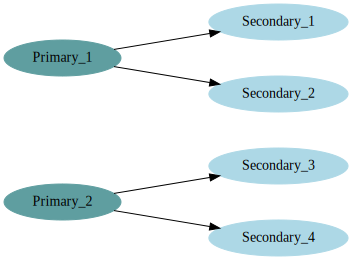

In [11]:
import graphviz

T1=graphviz.Digraph('T1', engine='neato')

T1.node('Primary_1', pos='-2,1!', color='cadetblue', style='filled')
T1.node('Primary_2', pos='-2,-1!', color='cadetblue', style='filled')
T1.node('Secondary_1', pos='1,1.5!', color='lightblue', style='filled')
T1.node('Secondary_2', pos='1,0.5!', color='lightblue', style='filled')
T1.node('Secondary_3', pos='1,-0.5!', color='lightblue', style='filled')
T1.node('Secondary_4', pos='1, -1.5!', color='lightblue', style='filled')

T1.edge('Primary_1', 'Secondary_1') #, style='dashed')
T1.edge('Primary_1', 'Secondary_2')
T1.edge('Primary_2', 'Secondary_3')
T1.edge('Primary_2', 'Secondary_4')

display(T1)

És akkor persze nézhetünk további lépcsőket: a másodlagos fertőzöttek elsődleges fertőzök lesznek. (Persze ez egy nagyon leegyszerűsített modell, mert a korábbi Primary-k is fertőzhetnek még, de ettől most eltekintünk)

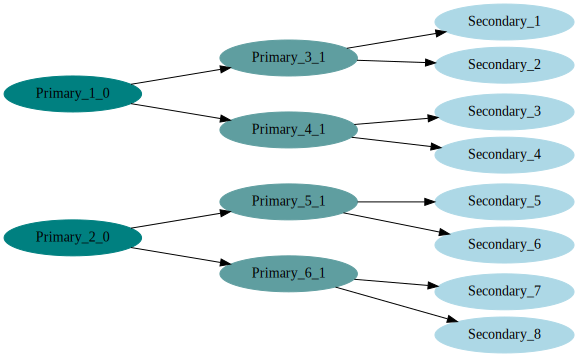

In [12]:
T2=graphviz.Digraph('T2', engine='neato')

T2.node('Primary_1_0', pos='-2,2!', color='teal', style='filled')
T2.node('Primary_2_0', pos='-2,0!', color='teal', style='filled')

T2.node('Primary_3_1', pos='1,2.5!', color='cadetblue', style='filled')
T2.node('Primary_4_1', pos='1,1.5!', color='cadetblue', style='filled')
T2.node('Primary_5_1', pos='1,0.5!', color='cadetblue', style='filled')
T2.node('Primary_6_1', pos='1, -0.5!', color='cadetblue', style='filled')

T2.node('Secondary_1', pos='4,3!', color='lightblue', style='filled')
T2.node('Secondary_2', pos='4,2.4!', color='lightblue', style='filled')
T2.node('Secondary_3', pos='4,1.75!', color='lightblue', style='filled')
T2.node('Secondary_4', pos='4,1.15!', color='lightblue', style='filled')
T2.node('Secondary_5', pos='4,0.5!', color='lightblue', style='filled')
T2.node('Secondary_6', pos='4, -0.1!', color='lightblue', style='filled')
T2.node('Secondary_7', pos='4,-0.75!', color='lightblue', style='filled')
T2.node('Secondary_8', pos='4, -1.35!', color='lightblue', style='filled')

T2.edge('Primary_1_0', 'Primary_3_1') #, style='dashed')
T2.edge('Primary_1_0', 'Primary_4_1')
T2.edge('Primary_2_0', 'Primary_5_1')
T2.edge('Primary_2_0', 'Primary_6_1')

T2.edge('Primary_3_1', 'Secondary_1')
T2.edge('Primary_3_1', 'Secondary_2')
T2.edge('Primary_4_1', 'Secondary_3')
T2.edge('Primary_4_1', 'Secondary_4')
T2.edge('Primary_5_1', 'Secondary_5')
T2.edge('Primary_5_1', 'Secondary_6')
T2.edge('Primary_6_1', 'Secondary_7')
T2.edge('Primary_6_1', 'Secondary_8')

display(T2)

**Hol jön be itt az $R_{0}$?**  
Egy ilyen 'transmission tree' rendszerint nem figyelhető meg, hacsak nem hajtanak végre szigorú kontakt nyomonkövetést mikrobiológiai vizsgálattal. Ehelyett egy valószínűségszámítás alapú rekonstrukciót csinálnak.

A másik, nem levezetett becslés, (ami $R_{a}$-t használja) átvihető diszkrét esetbe. Ez kell is, mivel az adatokat évente nézzük. Ekkor a becsült $R_{0}$ érték:

In [13]:
import sympy as sp

R_0 = sp.Symbol('R_0')
s = sp.Symbol('s')
j_t=sp.Symbol('j_t')
j_t_s=sp.Symbol('j_t-s')
g_s=sp.Symbol('g_s')

display(sp.Equality(R_0, j_t/sp.Sum(g_s*j_t_s, (s, 0, sp.oo))))
display(sp.Equality(1/R_0, sp.Sum(g_s*j_t_s, (s, 0, sp.oo))/j_t))

Eq(R_0, j_t/Sum(g_s*j_t-s, (s, 0, oo)))

Eq(1/R_0, Sum(g_s*j_t-s, (s, 0, oo))/j_t)

Ha ennek az egyenletnek vesszük a reciprokát, akkor az egyenlőség jobboldalán álló kifejezés  
--számlálója: a potenciális elsődlegesen fertőzöttek kapcsolatfelvételének száma, ami egyenlős valószínúséggel eredményez másodlagos fertőződést  
--nevezője: a másodlagos fertőzések száma  
Így ez a kifejezés a sikeres továbbfertőzés valószínűségét fejezi ki, ami így a baloldal szerint $\frac{1}{R_{0}}$


Ha figyelembe vesszük a hányados által meghatározott valószínűséget, akkor adhatunk egy várható értéket a következőleg megfertőzödöttek számára. Ekkor nem teljesen úgy fog kinézni az ábránk, mint a korábbiakban.

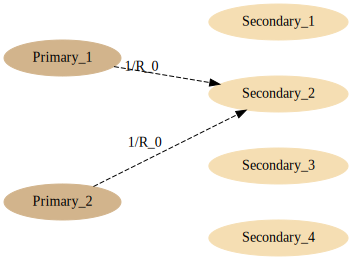

In [14]:
T3=graphviz.Digraph('T3', engine='neato')

T3.node('Primary_1', pos='-2,1!', color='tan', style='filled')
T3.node('Primary_2', pos='-2,-1!', color='tan', style='filled')
T3.node('Secondary_1', pos='1,1.5!', color='wheat', style='filled')
T3.node('Secondary_2', pos='1,0.5!', color='wheat', style='filled')
T3.node('Secondary_3', pos='1,-0.5!', color='wheat', style='filled')
T3.node('Secondary_4', pos='1, -1.5!', color='wheat', style='filled')

T3.edge('Primary_1', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')
T3.edge('Primary_2', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')

display(T3)

In [19]:
#Modellezes
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import BoxZoomTool, Circle, HoverTool, MultiLine, Plot, Range1d, ResetTool, TapTool, BoxSelectTool
from bokeh.plotting import from_networkx

G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'A3', 'A4', 'B1','B2','B3','B4','C1','C2','C3','C4','D1','D2','D3','D4','E1','E2','E3','E4','E5','E6',
                  'E7','E8','E9','E10','P1'])
node_positions = {'A1': (0.1, 0.9), 'A2': (0.1, 0.8), 'A3': (0.3, 0.9), 'A4': (0.3, 0.8), 
                  'B1':(0.5,0.9),'B2':(0.5,0.8),'B3':(0.7,0.9),'B4':(0.7,0.8), 
                  'C1':(0.1,0.6),'C2': (0.1, 0.5), 'C3': (0.3, 0.6), 'C4': (0.3, 0.5),
                  'D1':(0.5,0.6),'D2':(0.7,0.6),'D3':(0.5,0.5),'D4':(0.7,0.5),
                  'E1':(0.9,0.9),'E2':(1.1,0.9),'E3':(0.9,0.8),'E4':(1.1,0.8),
                  'E5':(0.9,0.6),'E6':(1.1,0.6),'E7':(0.9,0.5),'E8':(1.1,0.5),'E9':(0.9,0.7),'E10':(1.1,0.7),'P1':(0.6,0.7)}

G.add_edges_from([('A1', 'A2'), ('A2', 'A4'), ('A3', 'A4'), ('A3', 'A1'),('A2','A3'),('A1','A4'),
                  ('B1','B2'),('B2','B4'),('B3','B4'),('B3','B1'),('B2','B3'),('B4','B1'),
                  ('C1', 'C2'), ('C2', 'C4'), ('C3', 'C4'), ('C3', 'C1'),('C1','C4'),('C2','C3'),
                  ('D1', 'D2'), ('D2', 'D4'), ('D3', 'D4'), ('D3', 'D1'),('D4','D1'),('D2','D3'),
                  ('E1', 'E2'), ('E2', 'E4'), ('E3', 'E4'), ('E3', 'E1'),('E1','E4'),('E2','E3'),
                  ('E5', 'E6'), ('E6', 'E8'), ('E7', 'E8'), ('E7', 'E5'),('E5','E8'),('E6','E7'),
                  ('E10','E3'),('E9','E4'),
                  ('E9','E10'),('E9','E5'),('E3','E9'),('E6','E10'),('E10','E4'),('E9','E6'),('E10','E5'),
                  ('B3','E1'),('B4','E3'),('D2','E5'),('D4','E7')])
for node in G.nodes:
    if node != 'P1':
        G.add_edge('P1', node)
        
nx.set_node_attributes(G, node_positions, 'pos')
plot = Plot(width=400, height=400, x_range=Range1d(-1, 3), y_range=Range1d(-2, 2))
plot.add_tools(BoxZoomTool(), TapTool(),ResetTool(),BoxSelectTool() )

graph_renderer = from_networkx(G, nx.get_node_attributes(G, 'pos'))
graph_renderer.edge_renderer.glyph = MultiLine(line_color='lightgray', line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color="red", line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color="red", line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

graph_renderer.node_renderer.glyph = Circle(radius=0.05, fill_color="blue")

plot.renderers.append(graph_renderer)


output_file("Modellezes.html")
show(plot)

### Halálozási adatok elemzése 	&#x1F480;

Célunk megnézni, hogy a közzétett halálozási adatok mennyire pontosak.

Ötlet: Hasnolítsuk össze a Covid előtti ötéves halálozási átlaghoz az adatokat.

In [2]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

In [21]:
def adatcsvkeep(start_date,end_date,countries,keep_columns):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df[keep_columns]

    return df
eu_members= [
    "AUT",  # Austria
    "BEL",  # Belgium
    "BGR",  # Bulgaria
    "CYP",  # Cyprus
    "CZE",  # Czech Republic
    "DEU",  # Germany
    "DNK",  # Denmark
    "EST",  # Estonia
    "ESP",  # Spain
    "FIN",  # Finland
    "FRA",  # France
    "GRC",  # Greece
    "HRV",  # Croatia
    "HUN",  # Hungary
    "IRL",  # Ireland
    "ITA",  # Italy
    "LTU",  # Lithuania
    "LUX",  # Luxembourg
    "LVA",  # Latvia
    "MLT",  # Malta
    "NLD",  # Netherlands
    "POL",  # Poland
    "PRT",  # Portugal
    "ROU",  # Romania
    "SWE",  # Sweden
    "SVN",  # Slovenia
    "SVK",  # Slovakia
]
pd.set_option('display.max_rows', 10)

Egy egységes adatbázist akarunk létrehozni a két adathalmazból, nézzük meg, mit kell ehhez összerakni.

**Cél:** Heti adatokra lebontani a halálozásokat, mellé a Covid előtti átlagos halálozást betenni.

In [22]:
hu_halal=adatcsvkeep("2020-02-01","2020-02-01",eu_members,["iso_code","date","new_deaths"])
eu_halal=pd.read_csv("eu_deaths.csv")
display(hu_halal)
display(eu_halal)

,iso_code,date,new_deaths
21135,AUT,2020-02-01,0.0
31697,BEL,2020-02-01,0.0
49769,BGR,2020-02-01,0.0
76913,HRV,2020-02-01,0.0
81431,CYP,2020-02-01,0.0
...,...,...,...
277168,ROU,2020-02-01,0.0
308593,SVK,2020-02-01,0.0
310099,SVN,2020-02-01,0.0
320641,ESP,2020-02-01,0.0


,Country,2015-W01,2015-W02,2015-W03,2015-W04,2015-W05,2015-W06,2015-W07,2015-W08,2015-W09,...,2023-W43,2023-W44,2023-W45,2023-W46,2023-W47,2023-W48,2023-W49,2023-W50,2023-W51,2023-W52
0,AUT,1704.0,1768.0,1837.0,1792.0,1837.0,1926.0,1992.0,2020.0,1883.0,...,1761.0,1727.0,1759.0,1813.0,1817.0,1978.0,1875.0,1970.0,2071.0,1953.0
1,BEL,2461.0,2525.0,2526.0,2510.0,2644.0,2727.0,2892.0,2774.0,2643.0,...,2182.0,2059.0,2061.0,2225.0,2222.0,2278.0,2416.0,2459.0,2455.0,2434.0
2,BGR,2501.0,2512.0,2419.0,2339.0,2335.0,2295.0,2341.0,2535.0,2561.0,...,2020.0,1941.0,1990.0,2042.0,2123.0,2083.0,2010.0,2059.0,2023.0,2253.0
3,CYP,126.0,137.0,155.0,154.0,145.0,157.0,134.0,129.0,143.0,...,116.0,113.0,122.0,117.0,120.0,132.0,131.0,136.0,132.0,152.0
4,CZE,2378.0,2432.0,2396.0,2499.0,2580.0,2598.0,2732.0,2684.0,2609.0,...,2206.0,2133.0,2150.0,2315.0,2285.0,2362.0,2439.0,2422.0,2462.0,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,ROU,5803.0,5848.0,5602.0,5508.0,5560.0,5688.0,5815.0,6281.0,6139.0,...,4713.0,4587.0,4595.0,4478.0,4735.0,4741.0,4613.0,4759.0,4808.0,4089.0
24,SWE,1927.0,1966.0,1935.0,1946.0,1975.0,1868.0,2001.0,2107.0,2076.0,...,1806.0,1941.0,1863.0,1948.0,2038.0,2015.0,1965.0,2105.0,2163.0,2076.0
25,SVN,408.0,407.0,453.0,449.0,432.0,420.0,459.0,446.0,449.0,...,425.0,417.0,399.0,424.0,450.0,417.0,484.0,492.0,489.0,500.0
26,SVK,1112.0,1187.0,1210.0,1235.0,1292.0,1226.0,1275.0,1266.0,1235.0,...,1091.0,1036.0,1025.0,1048.0,1117.0,1195.0,1182.0,1185.0,1247.0,1246.0


### Interaktív megjelenítés

In [23]:
pd.set_option('display.max_rows', 10)

Írjunk egy függvény definíciót, amely összerakja a két adatsokaságot egy egységes táblázatba

In [24]:
def deathcountry(country):
    '''Adjuk meg a kívánt ország iso kódját

    Visszaad egy pd DataFramet
    '''
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None
    coviddata=pd.read_csv("owid-covid-data.csv")
    death=pd.read_csv("eu_deaths.csv")

    #covid halálok kinyerése
    coviddata=coviddata[coviddata["iso_code"]==country]
    coviddata=coviddata[["date","new_deaths"]]
    coviddata = coviddata[(coviddata["date"]>="2020-01-01") & (coviddata["date"]<="2022-12-31")]
    coviddata['date'] = pd.to_datetime(coviddata['date'])
    coviddata['week'] = coviddata['date'].dt.isocalendar().week
    coviddata['year'] = coviddata['date'].dt.year
    coviddata = coviddata.groupby(['year', 'week'])['new_deaths'].sum().reset_index()

    for row in range(len(coviddata)):
        if coviddata["week"][row]==53:
            coviddata["new_deaths"][row-1]+=coviddata["new_deaths"][row]
            coviddata=coviddata.drop(index=row)
    coviddata = coviddata.reset_index(drop=True)
    #covid halálok pipa

    #átlagos halál kinyerése
    death=death[death["Country"]==country]
    temp=[]
    for week in range(1,53):
        if week < 10:
            atlag = np.ceil(float((death[f"2015-W0{week}"]+death[f"2016-W0{week}"]+death[f"2017-W0{week}"]+death[f"2018-W0{week}"]+death[f"2019-W0{week}"])/5))
            temp.append(atlag)
        else:
            atlag = np.ceil(float((death[f"2015-W{week}"]+death[f"2016-W{week}"]+death[f"2017-W{week}"]+death[f"2018-W{week}"]+death[f"2019-W{week}"])/5))
            temp.append(atlag)
    atlag_halal=[]
    for i in range(0,3):
        for j in range(len(temp)):
            atlag_halal.append(temp[j])
    coviddata["avg_deaths"]=atlag_halal
    #átlagos halál pipa

    #összes halál kinyerése
    osszes_halal=[]
    for year in [2020,2021,2022]:
        for week in range(1,53):
            if week < 10:
                osszes_halal.append(float(death[f"{year}-W0{week}"]))
            else:
                osszes_halal.append(float(death[f"{year}-W{week}"]))
    coviddata["all_deaths"]=osszes_halal
    #összes halál pipa

    #covid halál nélkül
    covid_nelkul=[]
    for row in range(len(coviddata)):
        covid_nelkul.append(coviddata["all_deaths"][row]-coviddata["new_deaths"][row])
    coviddata["no_covid_deaths"]=covid_nelkul
    #covid halál nélkül pipa
    
    coviddata['Year_Week'] = coviddata['year'].astype(str) + '-' + coviddata['week'].astype(str)
    '''coviddata = coviddata.rename(columns={'year': 'Év'})
    coviddata = coviddata.rename(columns={'week': 'Hét'})
    coviddata = coviddata.rename(columns={'new_deaths': 'Covid Halálok'})'''
    return coviddata

In [25]:
deathcountry("HUN")

,year,week,new_deaths,avg_deaths,all_deaths,no_covid_deaths,Year_Week
0,2020,1,0.0,2886.0,2612.0,2612.0,2020-1
1,2020,2,0.0,2919.0,2585.0,2585.0,2020-2
2,2020,3,0.0,2925.0,2584.0,2584.0,2020-3
3,2020,4,0.0,3017.0,2723.0,2723.0,2020-4
4,2020,5,0.0,3057.0,2802.0,2802.0,2020-5
...,...,...,...,...,...,...,...
151,2022,48,42.0,2457.0,2647.0,2605.0,2022-48
152,2022,49,50.0,2576.0,2849.0,2799.0,2022-49
153,2022,50,43.0,2558.0,2803.0,2760.0,2022-50
154,2022,51,59.0,2639.0,2882.0,2823.0,2022-51


Definiáljunk egy függvény, ami egy iso code segítségével plotol egy ábrát

In [26]:

def showcountry(iso_code):
    df = deathcountry(iso_code)

    p = figure(x_range=df['Year_Week'], width=1000, height=500, title='Heti halálozások száma 2020-2023 között', x_axis_type="datetime", x_axis_label='Hetek', y_axis_label='Halálesetek száma', toolbar_location=None)

    avg_deaths = p.line(df['Year_Week'], df['avg_deaths'], line_width=2, legend_label='Ötéves átlag', color='black', line_cap='round')
    all_deaths = p.line(df['Year_Week'], df['all_deaths'], line_width=2, legend_label='Covid elhunytakkal', color='DeepPink', line_cap='round')
    new_deaths = p.line(df['Year_Week'], df['no_covid_deaths'], line_width=2, legend_label='Covid elhunytak nélkül', color='pink', line_cap='round')

    p.circle(df['Year_Week'], df['avg_deaths'], size=6, color='black', legend_label='Ötéves átlag')
    p.circle(df['Year_Week'], df['all_deaths'], size=6, color='DeepPink', legend_label='Covid elhunytakkal')
    p.circle(df['Year_Week'], df['no_covid_deaths'], size=6, color='pink', legend_label='Covid elhunytak nélkül')

    hover_avg_deaths = HoverTool(renderers=[avg_deaths], tooltips=[('Dátum', '@x'), ('Ötéves átlag', '@y')])
    hover_all_deaths = HoverTool(renderers=[all_deaths], tooltips=[('Dátum', '@x'), ('Covid elhunytakkal', '@y')])
    hover_new_deaths = HoverTool(renderers=[new_deaths], tooltips=[('Dátum', '@x'), ('Covid elhunytak nélkül', '@y')])

    p.add_tools(hover_new_deaths, hover_avg_deaths, hover_all_deaths)
    p.grid.grid_line_color = None
    #p.xaxis.major_label_orientation = 1

    p.toolbar.active_drag = None
    p.toolbar.active_scroll = None
    p.toolbar.active_tap = None

    p.xaxis.major_label_text_font_size = "0pt"

    # Customize figure
    p.legend.location = 'top_right'
    output_notebook()
    show(p)
    return


Futtassuk Magyarországra

In [27]:
showcountry("HUN")

Loading BokehJS ...

Ez szuper, de macerás lenne lefuttatni egyenként az összes országra, ezért tegyük okosabbá, ahol csak ki kell választani egy ország iso kódját, és azátlal kiplotolja a megfelelő ábrát

In [28]:
import ipywidgets as widgets

iso = eu_members

dd1 = widgets.Dropdown(options = iso, description = 'Ország')


def draw_part(iso):
    showcountry(iso)
    
    
out = widgets.interactive_output(draw_part, controls={'iso':dd1})
ui = widgets.HBox([dd1])

display(out, ui)

Output()

Átlagos halálozás

In [3]:
df = pd.read_csv('owid-covid-data.csv')

In [9]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

filtered_df = df[df['iso_code'].isin(eu_members)]
eu_countries = filtered_df['location'].tolist()
eu_countries=list(set(eu_countries))


In [13]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["location"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [14]:
start_date='2021-12-11'
end_date='2021-12-11'
E_Europe=adatcsv(start_date,end_date,eu_countries,delete_columns=[])
average_deaths = E_Europe['total_deaths'].mean()

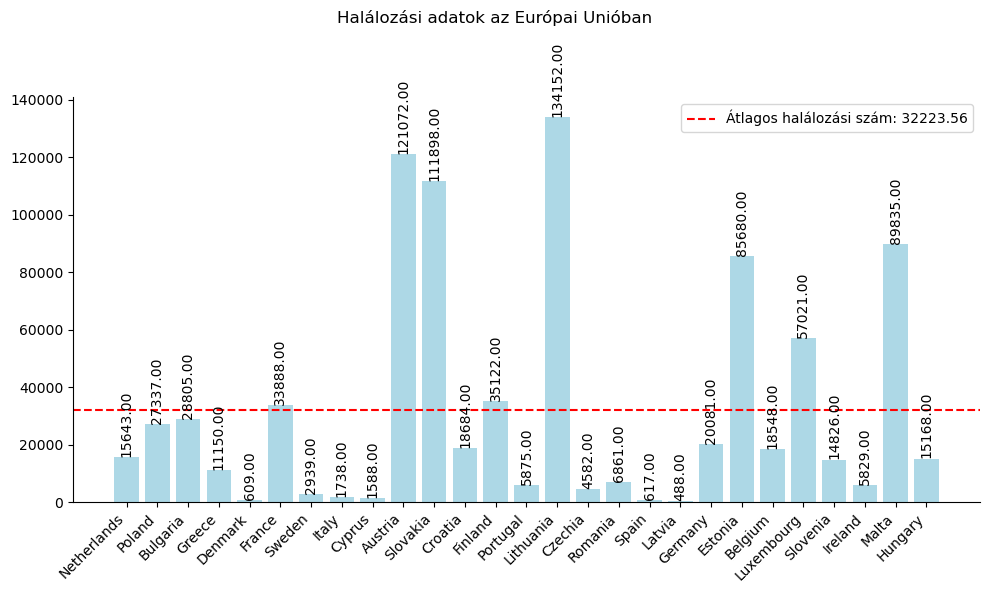

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
E_Europe['MortalityComparison'] = E_Europe['total_deaths'] 
plt.figure(figsize=(10, 6))
bars = plt.bar(eu_countries, E_Europe['MortalityComparison'], color='lightblue')
data={'Countries':['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']}
sample_df = pd.DataFrame(data)
plt.suptitle('Halálozási adatok az Európai Unióban')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, rotation=90) 
plt.axhline(y=average_deaths, color='red', linestyle='--', label=f'Átlagos halálozási szám: {average_deaths:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


Halálozás vs. Fertőzés

In [32]:
start_date=str(input('Adj meg egy kötőjellel elválasztott dátumot'))
end_date=start_date
pupak=adatcsv(start_date,end_date,eu_countries,delete_columns=[])
#2021-01-13

Text(0.5, 0, 'Esetek')

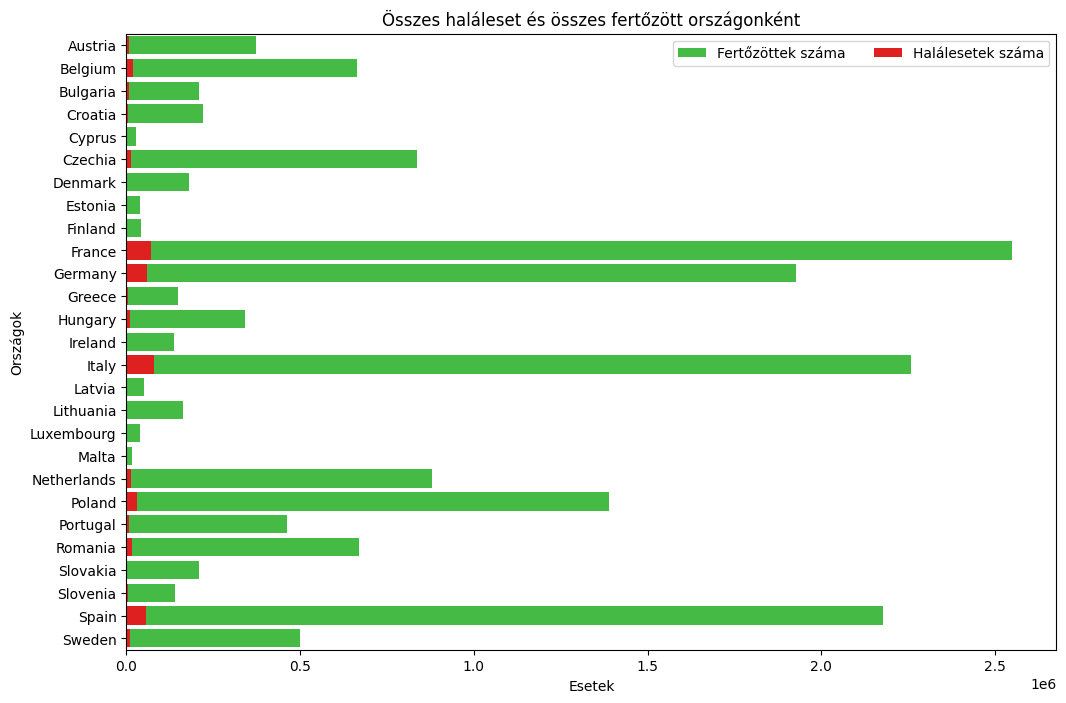

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
data = pupak[['location','total_cases','total_deaths']]
data.sort_values('total_cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="total_cases", y="location", data=pupak,label="Fertőzöttek száma", color="limegreen")

sns.set_color_codes("muted")
sns.barplot(x="total_deaths", y="location", data=pupak, label="Halálesetek száma", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Összes haláleset és összes fertőzött országonként')
plt.ylabel('Országok')
plt.xlabel('Esetek')

Geo heatmap

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import mpl
from bokeh.transform import linear_cmap
from bokeh.models import  ColorBar, NumeralTickFormatter

### Vizualizáljuk az összes esetek számát és a halálozások számát térképen

In [35]:
output_notebook()

Loading BokehJS ...

In [36]:
def adatcsvkeep(start_date: str,end_date: str,countries: list,keep_columns: list):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df[keep_columns]

    return df
eu_members= [
    "AUT",  # Austria
    "BEL",  # Belgium
    "BGR",  # Bulgaria
    "CYP",  # Cyprus
    "CZE",  # Czech Republic
    "DEU",  # Germany
    "DNK",  # Denmark
    "EST",  # Estonia
    "ESP",  # Spain
    "FIN",  # Finland
    "FRA",  # France
    "GRC",  # Greece
    "HRV",  # Croatia
    "HUN",  # Hungary
    "IRL",  # Ireland
    "ITA",  # Italy
    "LTU",  # Lithuania
    "LUX",  # Luxembourg
    "LVA",  # Latvia
    "MLT",  # Malta
    "NLD",  # Netherlands
    "POL",  # Poland
    "PRT",  # Portugal
    "ROU",  # Romania
    "SWE",  # Sweden
    "SVN",  # Slovenia
    "SVK",  # Slovakia
]

In [37]:
data=adatcsvkeep("2023-12-31","2023-12-31",eu_members,["iso_code","date","location","total_cases","total_deaths"])

In [38]:
eu_cities = {
    'AUT': (48.2082, 16.3738),
    'BEL': (50.8503, 4.3517),
    'BGR': (42.6977, 23.3219),
    'HRV': (45.8150, 15.9819),
    'CYP': (35.1856, 33.3823),
    'CZE': (50.0755, 14.4378),
    'DNK': (55.6761, 12.5683),
    'EST': (59.4370, 24.7536),
    'FIN': (60.1695, 24.9354),
    'FRA': (48.8566, 2.3522),
    'DEU': (52.5200, 13.4050),
    'GRC': (37.9838, 23.7275),
    'HUN': (47.4979, 19.0402),
    'IRL': (53.3498, -6.2603),
    'ITA': (41.9028, 12.4964),
    'LVA': (56.9496, 24.1052),
    'LTU': (54.6872, 25.2797),
    'LUX': (49.8153, 6.1296),
    'MLT': (35.8989, 14.5146),
    'NLD': (52.3676, 4.9041),
    'POL': (52.2297, 21.0122),
    'PRT': (38.7223, -9.1393),
    'ROU': (44.4268, 26.1025),
    'SVK': (48.1486, 17.1077),
    'SVN': (46.0569, 14.5058),
    'ESP': (40.4168, -3.7038),
    'SWE': (59.3293, 18.0686)
}

A bokeh csak mercator koordinátákkal tud számolni, ezért a lon-lan koordinátákat át kell váltani

In [39]:
def mercator_coord(coord):
    
    lat = coord[0]
    lon = coord[1]
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return [x, y]

eu_cities_mercator=[mercator_coord(value) for value in eu_cities.values()]
eu_mercator_x=[eu_cities_mercator[i][0] for i in range(len(eu_cities_mercator))]
eu_mercator_y=[eu_cities_mercator[i][1] for i in range(len(eu_cities_mercator))]

In [40]:
total_cases=[]
for key in eu_cities:
    for index in data.index:
        if data["iso_code"][index]==key:
            total_cases.append(data["total_cases"][index])

### Összes esetek száma

In [41]:
printdata={
    'total_cases' : total_cases,
    'mercator_x' : eu_mercator_x,
    'mercator_y' : eu_mercator_y,
    'country' : [key for key in eu_cities]
    }
df=pd.DataFrame(printdata)
color_mapper = linear_cmap(field_name = 'total_cases', palette = mpl['Inferno'][11][::-1], low = df['total_cases'].min(), high = df['total_cases'].max())
source = ColumnDataSource(data=df)
tooltips = [("Összes eset","@total_cases"), ("Ország","@country") ]
p = figure(title = 'Összes esetek száma az EU-s tagállamokban',
           x_axis_type="mercator", y_axis_type="mercator", x_axis_label = 'Hosszúsági kör', 
           y_axis_label = 'Szélességi kör', tooltips = tooltips)
p.add_tile("CartoDB Positron retina")
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=30, fill_alpha = 0.7)
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter = NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff = 13, width=8, location=(0,0))
p.add_layout(color_bar, 'right')
show(p)

In [42]:
total_deaths=[]
for key in eu_cities:
    for index in data.index:
        if data["iso_code"][index]==key:
            total_deaths.append(data["total_deaths"][index])

### Halálozások száma

In [43]:
printdata1={
    'total_deaths' : total_deaths,
    'mercator_x' : eu_mercator_x,
    'mercator_y' : eu_mercator_y,
    'country' : [key for key in eu_cities]
    }
df=pd.DataFrame(printdata1)
color_mapper = linear_cmap(field_name = 'total_deaths', palette = mpl['Inferno'][11][::-1], low = df['total_deaths'].min(), high = df['total_deaths'].max())
source = ColumnDataSource(data=df)
tooltips = [("Összes haláleset","@total_deaths"), ("Ország","@country") ]
p = figure(title = 'Halálozások száma az EU-s tagállamokban',
           x_axis_type="mercator", y_axis_type="mercator", x_axis_label = 'Hosszúsági kör', 
           y_axis_label = 'Szélességi kör', tooltips = tooltips)
p.add_tile("CartoDB Positron retina")
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=30, fill_alpha = 0.7)
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter = NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff = 13, width=8, location=(0,0))
p.add_layout(color_bar, 'right')
show(p)

### Halálozások és fertőzések száma hetekre lebontva

Text(0.5, 1.0, 'Halálozások hónapokra lebontva')

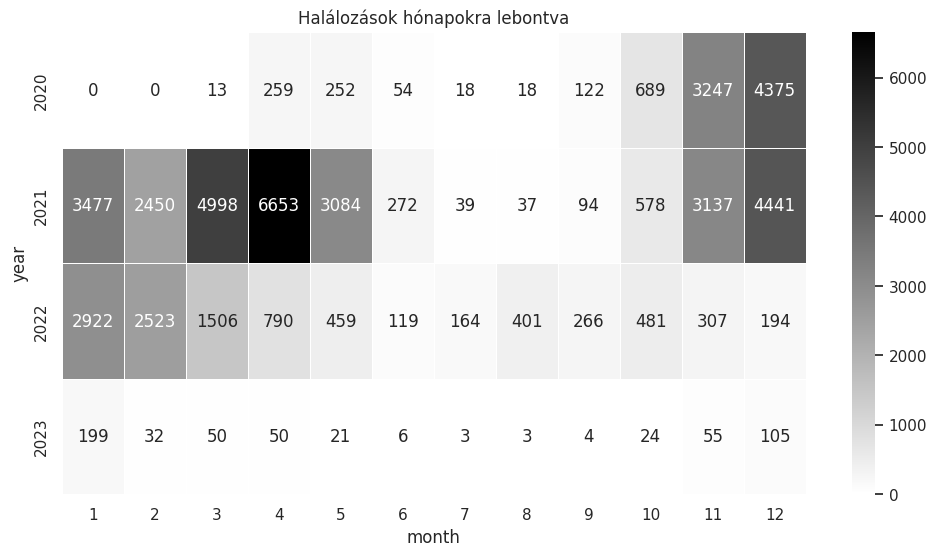

In [44]:
halal=adatcsvkeep("2020-01-01","2023-12-31",["HUN"],["date","new_deaths"])

halal['date'] = pd.to_datetime(halal['date'])

halal['month'] = halal['date'].dt.month
halal['year'] = halal['date'].dt.year
monthly_deaths = halal.groupby(['year', 'month'])['new_deaths'].sum().reset_index()
sns.set_theme()

monthly_deaths = (
    monthly_deaths
    .pivot(index="year", columns="month", values="new_deaths")
)

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(monthly_deaths, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="gist_yarg")
plt.title("Halálozások hónapokra lebontva")

Text(0.5, 1.0, 'Új esetszámok hónapokra lebontva')

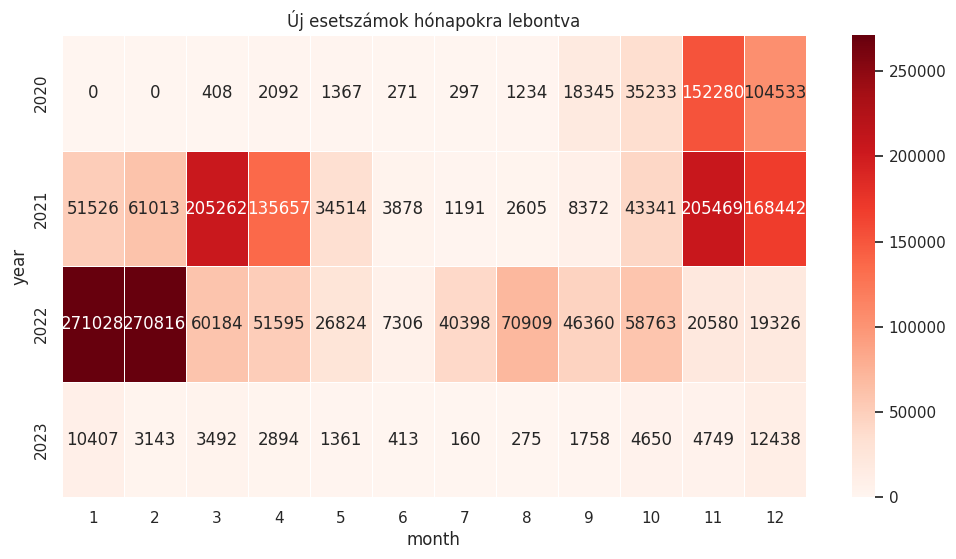

In [45]:
halal=adatcsvkeep("2020-01-01","2023-12-31",["HUN"],["date","new_cases"])

halal['date'] = pd.to_datetime(halal['date'])

halal['month'] = halal['date'].dt.month
halal['year'] = halal['date'].dt.year
monthly_deaths = halal.groupby(['year', 'month'])['new_cases'].sum().reset_index()
sns.set_theme()

monthly_deaths = (
    monthly_deaths
    .pivot(index="year", columns="month", values="new_cases")
)

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(monthly_deaths, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="Reds")
plt.title("Új esetszámok hónapokra lebontva")

# Korrelációk az adatok között  
Az alábbiakban azt vizsgáljuk meg, hogy az egyes országokban az intézkedések, az országra jellemző tulajdonságok mennyire befolyásolták egymást. Azaz azt akarjuk közelebbről szemügyre venni, hogy az egyes adatok között milyen összefüggés állapítható meg.

In [23]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

Továbbra is az EU országait tekintjük.

In [16]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

In [17]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["iso_code"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

Persze igyekszünk azokat az adatokat kiemelni, amelyekre sejtjük, hogy releváns hatással lehetettek a járvány alakulására, vagy az egyes szempontoknál fontos kimenettel bírtak. (Például: lehet, hogy egy adott korosztályban a vakcinálások kevésbé voltak hatékonyak)

In [18]:
eu=adatcsv("2020-02-15","2021-12-31",eu_members,["extreme_poverty","continent","location","date","new_cases","handwashing_facilities","total_boosters","total_tests","new_tests","tests_units","tests_per_case","positive_rate","new_deaths","hosp_patients","reproduction_rate","icu_patients","icu_patients_per_million","hosp_patients_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand","new_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","total_boosters_per_hundred","new_people_vaccinated_smoothed_per_hundred","stringency_index","cardiovasc_death_rate","diabetes_prevalence","excess_mortality_cumulative_absolute","excess_mortality_cumulative","excess_mortality","excess_mortality_cumulative_per_million"])
eu
# alapból 2020-02-15 2022-12-31-ig

,iso_code,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
21149,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21150,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21151,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21152,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
21153,AUT,NaN,NaN,NaN,NaN,NaN,106.749,44.4,19.202,13.748,45436.686,28.4,30.9,7.37,81.54,0.922,8939617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327360,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327361,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327362,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349
327363,SWE,1286608.0,15302.0,NaN,NaN,NaN,24.718,41.0,19.985,13.433,46949.283,18.8,18.9,2.22,82.80,0.945,10549349


In [19]:
last_indexes=[]
for country in eu_members:
    last_occurrence_index = eu[eu['iso_code'] == country].index[-1]
    last_indexes.append(last_occurrence_index)
last_indexes
eu.index

Index([ 21149,  21150,  21151,  21152,  21153,  21154,  21155,  21156,  21157,
        21158,
       ...
       327355, 327356, 327357, 327358, 327359, 327360, 327361, 327362, 327363,
       327364],
      dtype='int64', length=18522)

In [20]:
eu.drop(index=[i for i in eu.index if i not in last_indexes], inplace=True)
eu = eu.drop(["iso_code"], axis=1)

### Korreláció
Mi is az a korrelációs együttható? Lényegében egy olyan mérőszám, ami azt hivatott megmutatni, hogy két mennyiség között van-e összefüggés, illetve ha van, akkor milyen mértékű. (Persze, ha $R$ közel van 1-hez, akkor pozitívan szignifikáns az összefüggés, ha -1-hez, akkor negatívan szignifikáns az összefüggés, azaz ha az egyik érték nő, a másik csökken.)
    $$R = \frac{E(XY)-E(X)E(Y)}{D(X)D(Y)} \in [-1,1]$$


Az alábbiakban meghatároztunk egy korrelációs mátrixot, ami az általunk választott szempontok halmazából minden Descartes-szorzat párosra kiszámítja a fenti képlet alapján a korrelációt.

In [21]:
corr_matrix = eu.corr()

Talán a leghatásosabb vizualizációs eszköz a hőtérkép. A mi esetünkben annál nagyobb a korrelációs együttható két adatra, ha az adott rubrika piroshoz közeli árnyalatot vesz fel, illetve anál kisebb, ha kékhez közeli árnyalatot vesz fel.

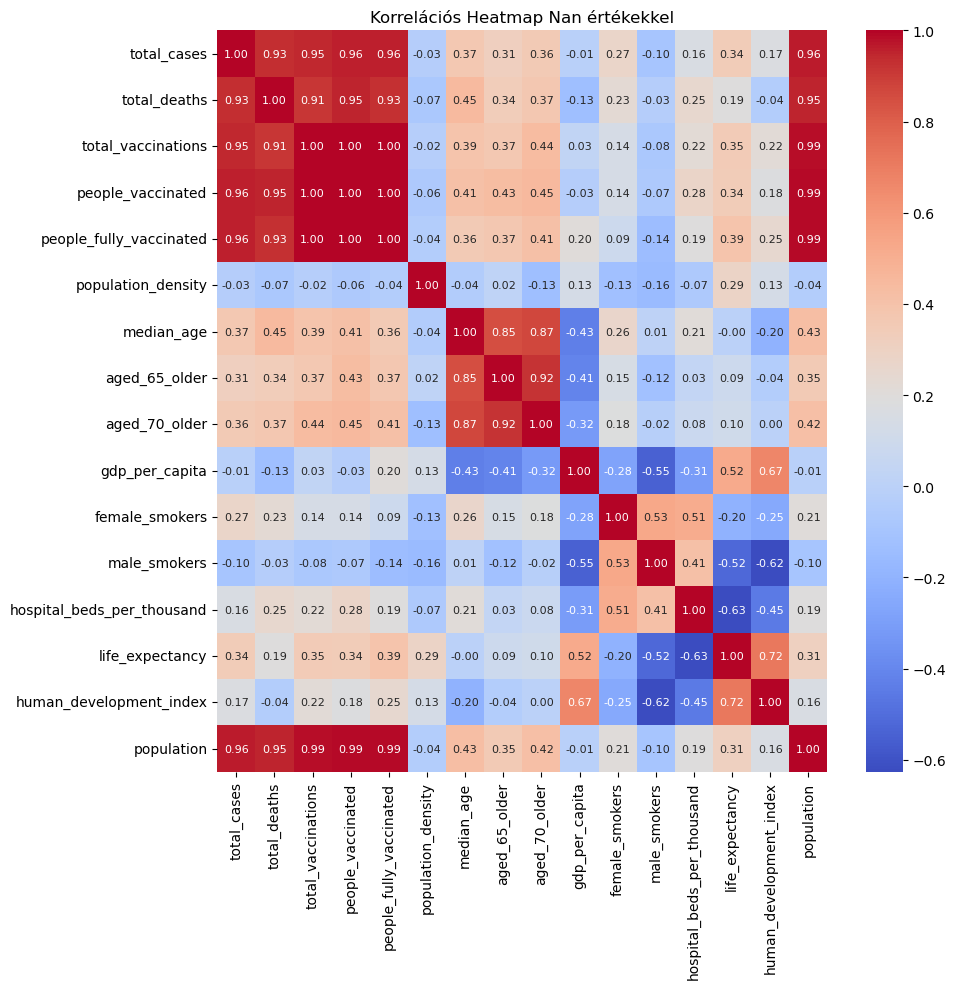

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Korrelációs Heatmap Nan értékekkel')
plt.tight_layout()
plt.show()

Azt láttuk, hogy a NaN adatok is befolyáslták az eredményünket, így érdemes volt azt az adathalmazt is tekntenünk, amelyből ezeket elhagytuk.

In [54]:
indexes=eu.index
indexes

Index([ 21834,  32396,  50468,  77612,  82130,  83636,  86668, 101581, 113675,
       115181, 124217, 128735, 149836, 158892, 163410, 181502, 190538, 195095,
       204946, 233580, 270337, 271843, 277867, 309292, 310798, 321340, 327364],
      dtype='int64')

In [55]:
eu1=eu.dropna()

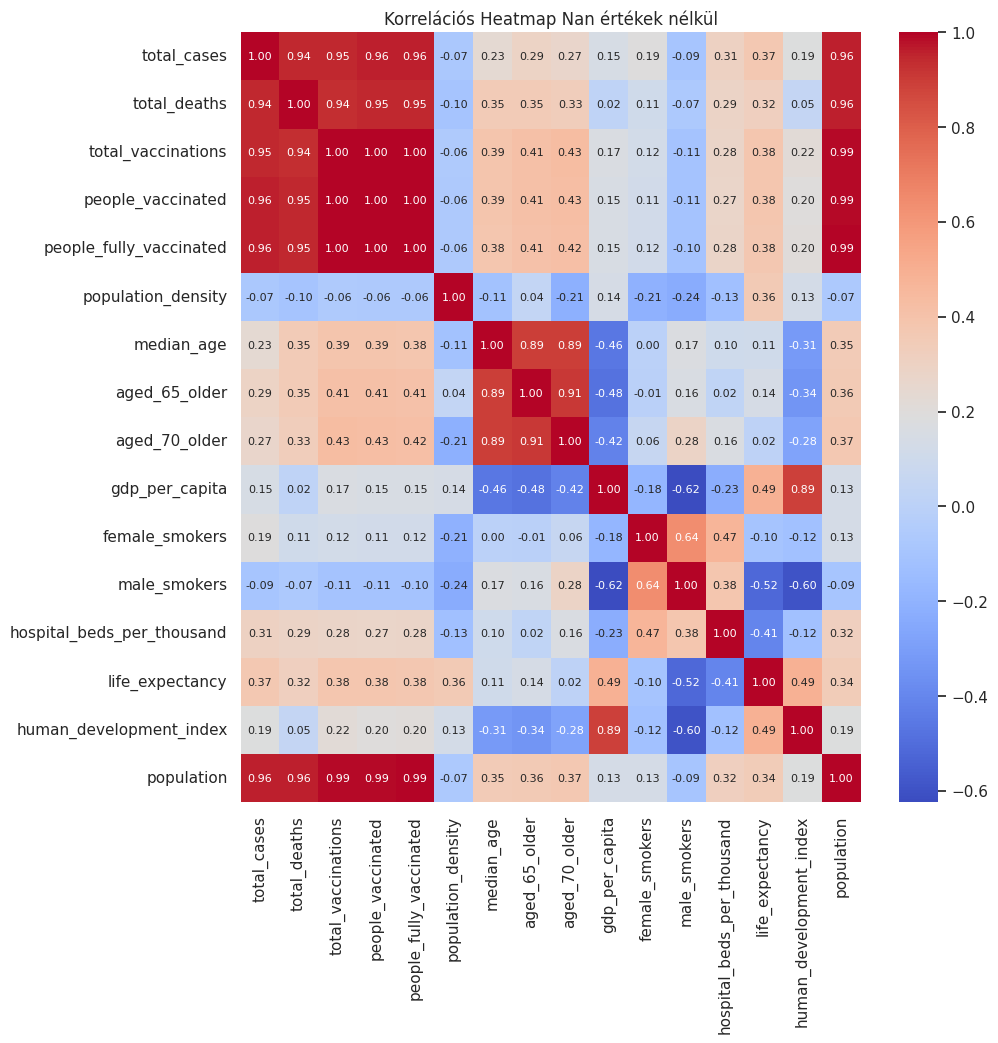

In [56]:
corr1=eu1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Korrelációs Heatmap Nan értékek nélkül')
plt.show()

Fontos kérdés, hogy ha eltekintünk azoktól a soroktól, amelyek túl sok NaN adatot tartalmaznak, akkor mely országok maradnak hátra. (Így végső soron nem az EU országairól kapunk egy kollektív képet, hanem az alábbiakban felsorolt néhány országról)

In [57]:
indexes1=eu1.index

In [58]:
data=pd.read_csv("owid-covid-data.csv")
for id1 in indexes1:
    for id2 in indexes:
        if id1==id2: 
            print(data["location"][id1])

Austria
Belgium
Croatia
Czechia
Denmark
Estonia
France
Germany
Greece
Ireland
Italy
Latvia
Lithuania
Malta
Netherlands
Poland
Portugal
Slovenia


Persze a korábbi ábrában egyszerre szerepel minden vizsgálandó szempont. Ha két konkrét adat összefüggésére vagyunk kiváncsiak, akkor az alábbiakban kiválaszthatjuk melyek ezek és ismét gyönyörködhetünk a színes hőtérképekben.

In [59]:
import ipywidgets as widgets

categorial_columns = [column for column in eu.columns]
categorial_rows = [row for row in eu.columns]

dd1 = widgets.Dropdown(options = categorial_columns, description = 'column')
dd2 = widgets.Dropdown(options = categorial_rows, description = 'row')

cmap=sns.color_palette("blend:#7AB,#EDA")

def draw_part(column, row):
    corr=eu1[[column, row]].corr()
    p = sns.heatmap(corr, cmap=cmap, fmt=".2f")
    
out = widgets.interactive_output(draw_part, {'column': dd1, 'row':dd2})
ui = widgets.HBox([dd1, dd2])

display(ui, out)

Output()

OLTOTTSÁG

In [65]:
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380455,ZWE,Africa,Zimbabwe,2024-02-14,266328.0,0.0,5737.0,0.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
380456,ZWE,Africa,Zimbabwe,2024-02-15,266328.0,0.0,5737.0,0.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
380457,ZWE,Africa,Zimbabwe,2024-02-16,266328.0,0.0,5737.0,0.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
380458,ZWE,Africa,Zimbabwe,2024-02-17,266328.0,0.0,5737.0,0.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [69]:
europe_rows = df[df['continent'] == 'Europe']
df_k= df['people_vaccinated']
start_date='2020-11-05'
end_date='2022-11-12'
hun=['HUN']
K= adatcsv(start_date,end_date,hun)

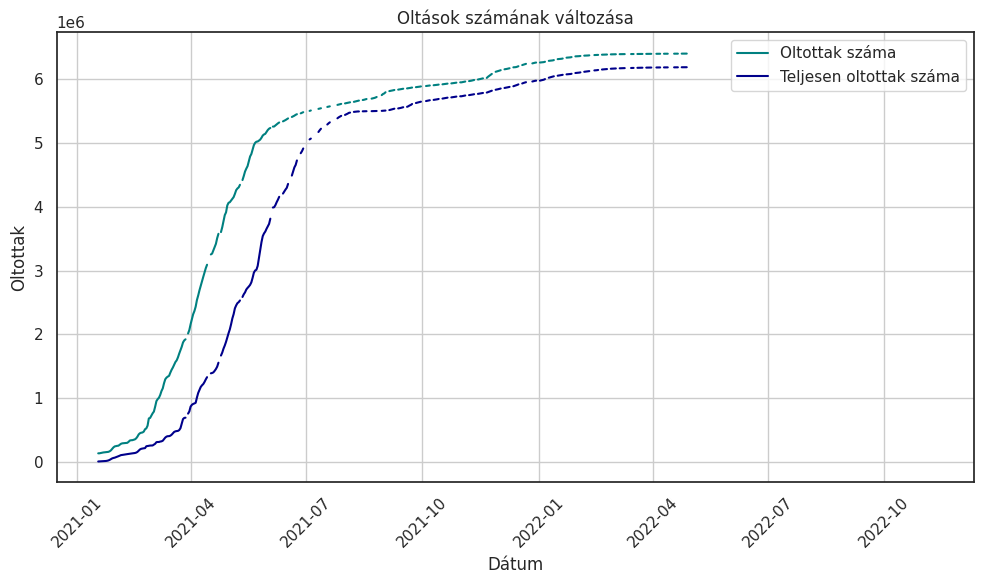

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

K['date'] = pd.to_datetime(K['date'])
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.plot(K['date'], K['people_vaccinated'], linestyle='-', color='teal', label='Oltottak száma')
plt.plot(K['date'], K['people_fully_vaccinated'], linestyle='-', color='darkblue',label='Teljesen oltottak száma')

plt.title('Oltások számának változása')
plt.xlabel('Dátum')
plt.ylabel('Oltottak')
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


In [73]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["location"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [76]:

countries=['Hungary','Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',]
start_date='2021-02-13'
end_date=start_date
Vacc=adatcsv(start_date,end_date,countries)
Vacc=Vacc[['location','people_vaccinated']]

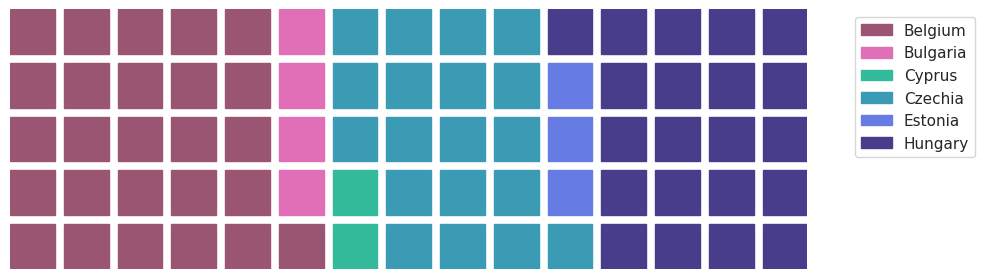

In [77]:
from pywaffle import Waffle

data1={'Belgium':Vacc.iloc[0,1],'Bulgaria':Vacc.iloc[1,1] ,'Cyprus':Vacc.iloc[3,1] ,'Czechia':Vacc.iloc[4,1],
       'Estonia':Vacc.iloc[6,1], 'Hungary':Vacc.iloc[8,1]}
fig=plt.figure(
    FigureClass=Waffle,
    rows =5,
    columns=15,
    figsize=(10,5),
    colors=['#995571','#e16fb7','#32BA9A','#3C9BB4','#667CE4','darkslateblue'],
    values=data1,
    legend={'loc':"upper left",'bbox_to_anchor':(1.05,1)})

plt.show()